In [8]:
from bs4 import BeautifulSoup
import requests
import json, pandas as pd

In [ ]:
##월별 

monthLis =['01','02','03','04','05','06','07','08','09','10','11','12']

item =[]
price =[]
previousPrice = []
year =[]
month = []
fluctuationRate = []
cnt = 1

for y in range(2000,2023,1):
    print(y)
    for m in monthLis:
        url = "https://www.kamis.or.kr/customer/price/retail/catalogue.do?action=monthly&yyyy={}&mm={}&countycode=&itemcategorycode=500&convert_kg_yn=N&convert_kg_yn=N".format(y,m)
        response = requests.get(url)

        soup = BeautifulSoup(response.content,"html.parser")

        try:
            while True:
                item2 = soup.select('table.wtable3 > tr > td')[cnt].get_text()
                cnt += 1


                if(item2 == "계란"):
                    item.append(item2)

                    price.append(soup.select('table.wtable3 > tr > td')[cnt+2].get_text().replace(',',""))
                    previousPrice.append(soup.select('table.wtable3 > tr > td')[cnt+3].get_text().replace(',',""))
                    fluctuationRate.append(soup.select('table.wtable3 > tr > td')[cnt+5].get_text())
                    year.append("{}년".format(y))
                    month.append("{}월".format(m))
                    cnt=0
                    break
        except:
            pass

In [ ]:
## 년별

item =[]
price =[]
previousPrice = []
year =[]
month = []
fluctuationRate = []
cnt = 1
#countycode :1101 서울 // 2100 부산 //2501 대전
for y in range(2000,2023,1):
    print(y)
    url = "https://www.kamis.or.kr/customer/price/retail/catalogue.do?action=yearly&yyyy={}&countycode=2501&itemcategorycode=500&convert_kg_yn=N&convert_kg_yn=N".format(y)
    response = requests.get(url)

    soup = BeautifulSoup(response.content,"html.parser")

    try:
        while True:
            item2 = soup.select('table.wtable3 > tr > td')[cnt].get_text()


            if(item2 == "계란"):
                print(cnt)
                item.append(item2)
                price.append(soup.select('table.wtable3 > tr > td')[cnt+3].get_text().replace(',',""))
                previousPrice.append(soup.select('table.wtable3 > tr > td')[cnt+4].get_text().replace(',',""))
                fluctuationRate.append(soup.select('table.wtable3 > tr > td')[cnt+5].get_text())
                year.append("{}년".format(y))
                #month.append("{}월".format(m))
                cnt=0
                break
        
            else:
                cnt += 1
    except:
        pass
            
  

In [126]:
daejeon_egg = pd.DataFrame([ x for x in zip(item,price,previousPrice,year,fluctuationRate)])


In [129]:
df2.columns = ['품목','월평균','전원평균','년','등락률']
daejeon_egg.columns = ['품목','월평균','전원평균','년','등락률']
busan_egg.columns = ['품목','월평균','전원평균','년','등락률']
seoul_egg.columns = ['품목','월평균','전원평균','년','등락률']

daejeon_egg['등락률'] = daejeon_egg['등락률'].astype(float)
daejeon_egg['월평균'] = daejeon_egg['월평균'].astype(int)

busan_egg['등락률'] = busan_egg['등락률'].astype(float)
busan_egg['월평균'] = busan_egg['월평균'].astype(int)

seoul_egg['등락률'] = seoul_egg['등락률'].astype(float)
seoul_egg['월평균'] = seoul_egg['월평균'].astype(int)

seoul_egg['등락률'] = seoul_egg['등락률'].astype(float)
seoul_egg['월평균'] = seoul_egg['월평균'].astype(int)

df2.to_excel("전국계란.xlsx")
daejeon_egg.to_excel("대전계란.xlsx")
busan_egg.to_excel("부산계란.xlsx")
seoul_egg.to_excel("서울계란.xlsx")

In [135]:
df2 = pd.read_excel('전국계란.xlsx')
daejeon_egg = pd.read_excel('대전계란.xlsx')
busan_egg = pd.read_excel('부산계란.xlsx')
seoul_egg = pd.read_excel('서울계란.xlsx')

In [136]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

warnings.filterwarnings(action='ignore')

<AxesSubplot: title={'center': '2000~2021 계란 가격비교'}, xlabel='년', ylabel='월평균'>

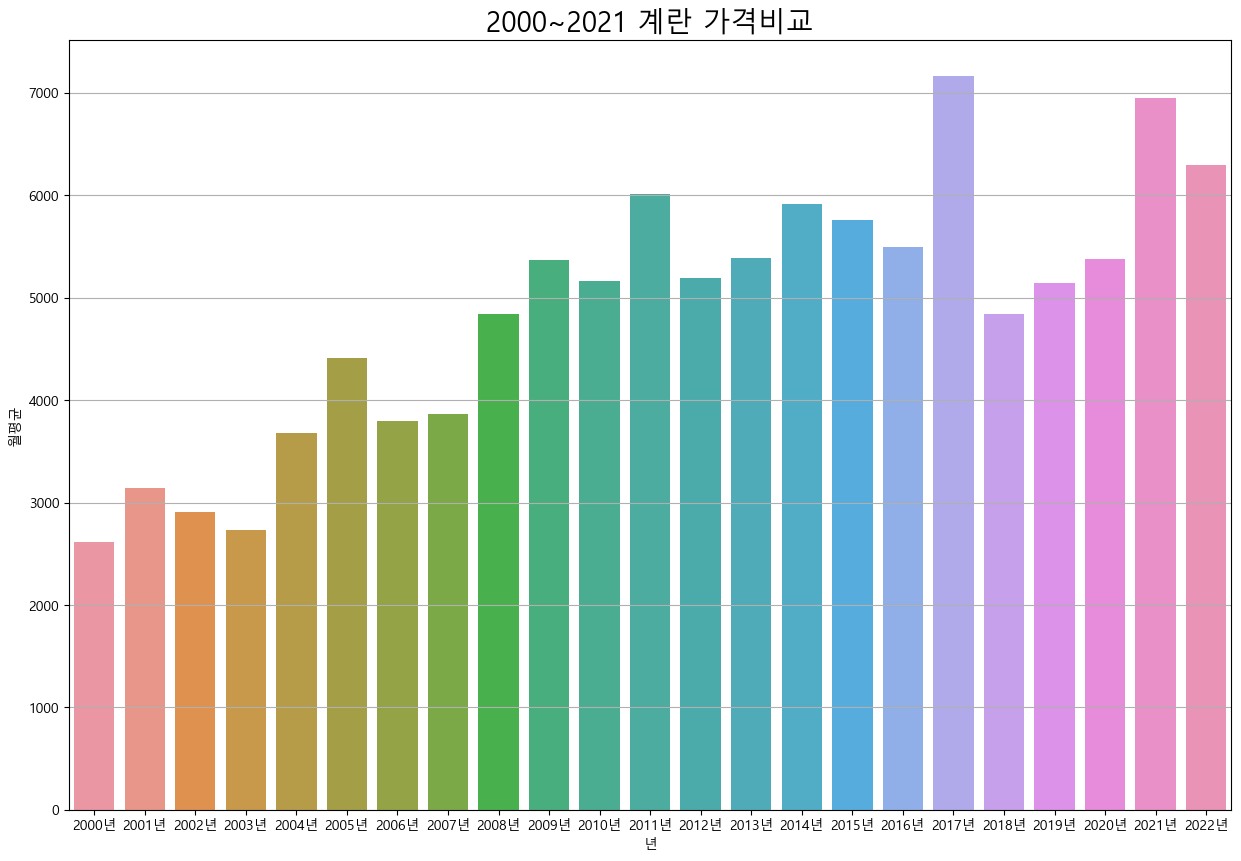

In [137]:
plt.figure(figsize=(15,10)) # size
plt.title('2000~2021 계란 가격비교', size= 20)
plt.grid(True) #눈금
plt.rotation=45
sns.barplot(x="년", y="월평균", data=df2)


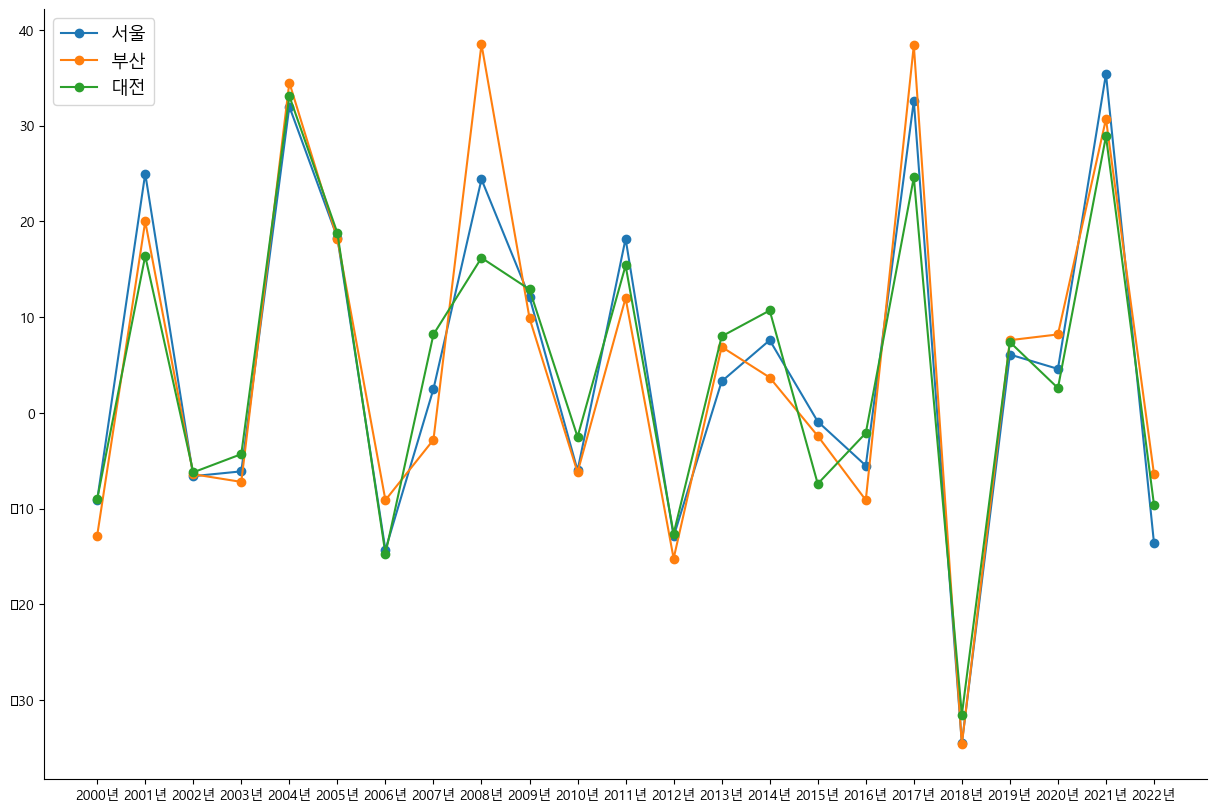

In [138]:
fig = plt.figure(figsize=(15,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.spines['right'].set_visible(False) ## 오른쪽 축 숨김
ax.spines['top'].set_visible(False) ## 위쪽 축 숨김



#ax.plot(df2['년'],df2['등락률'],marker='o',label='전국') ## 선그래프 생성
ax.plot(seoul_egg['년'],seoul_egg['등락률'],marker='o',label='서울') ## 선그래프 생성
ax.plot(busan_egg['년'],busan_egg['등락률'],marker='o',label='부산') ## 선그래프 생성
ax.plot(daejeon_egg['년'],daejeon_egg['등락률'],marker='o',label='대전') ## 선그래프 생성


ax.legend(loc='upper left', fontsize=13) ## 범례 생성

plt.show()

In [142]:
df = pd.read_excel("계란값비교.xlsx")

egg2017 = df[df["년"] == "2017년"]
egg2018 = df[df["년"] == "2018년"]
egg2019 = df[df["년"] == "2019년"]
egg2020 = df[df["년"] == "2020년"]
egg2021 = df[df["년"] == "2021년"]

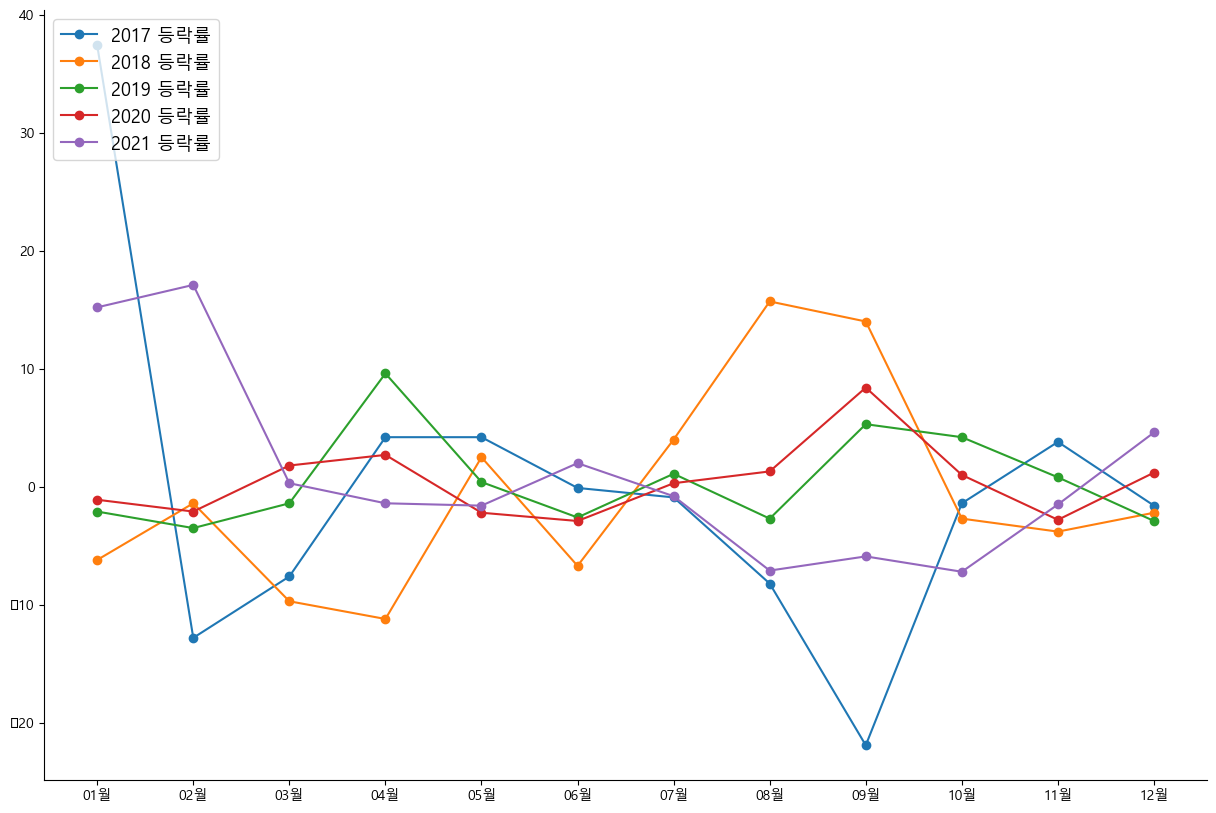

In [144]:
fig = plt.figure(figsize=(15,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.spines['right'].set_visible(False) ## 오른쪽 축 숨김
ax.spines['top'].set_visible(False) ## 위쪽 축 숨김



ax.plot(egg2017['월'],egg2017['등락률'],marker='o',label='2017 등락률') ## 선그래프 생성
ax.plot(egg2018['월'],egg2018['등락률'],marker='o',label='2018 등락률') ## 선그래프 생성
ax.plot(egg2019['월'],egg2019['등락률'],marker='o',label='2019 등락률') ## 선그래프 생성
ax.plot(egg2020['월'],egg2020['등락률'],marker='o',label='2020 등락률') ## 선그래프 생성
ax.plot(egg2021['월'],egg2021['등락률'],marker='o',label='2021 등락률') ## 선그래프 생성

ax.legend(loc='upper left', fontsize=13) ## 범례 생성

plt.show()

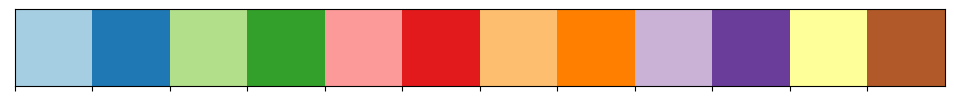

In [161]:
# color palette 설정
custom_palette2 = sns.color_palette("Paired", 12)
sns.palplot(custom_palette2)

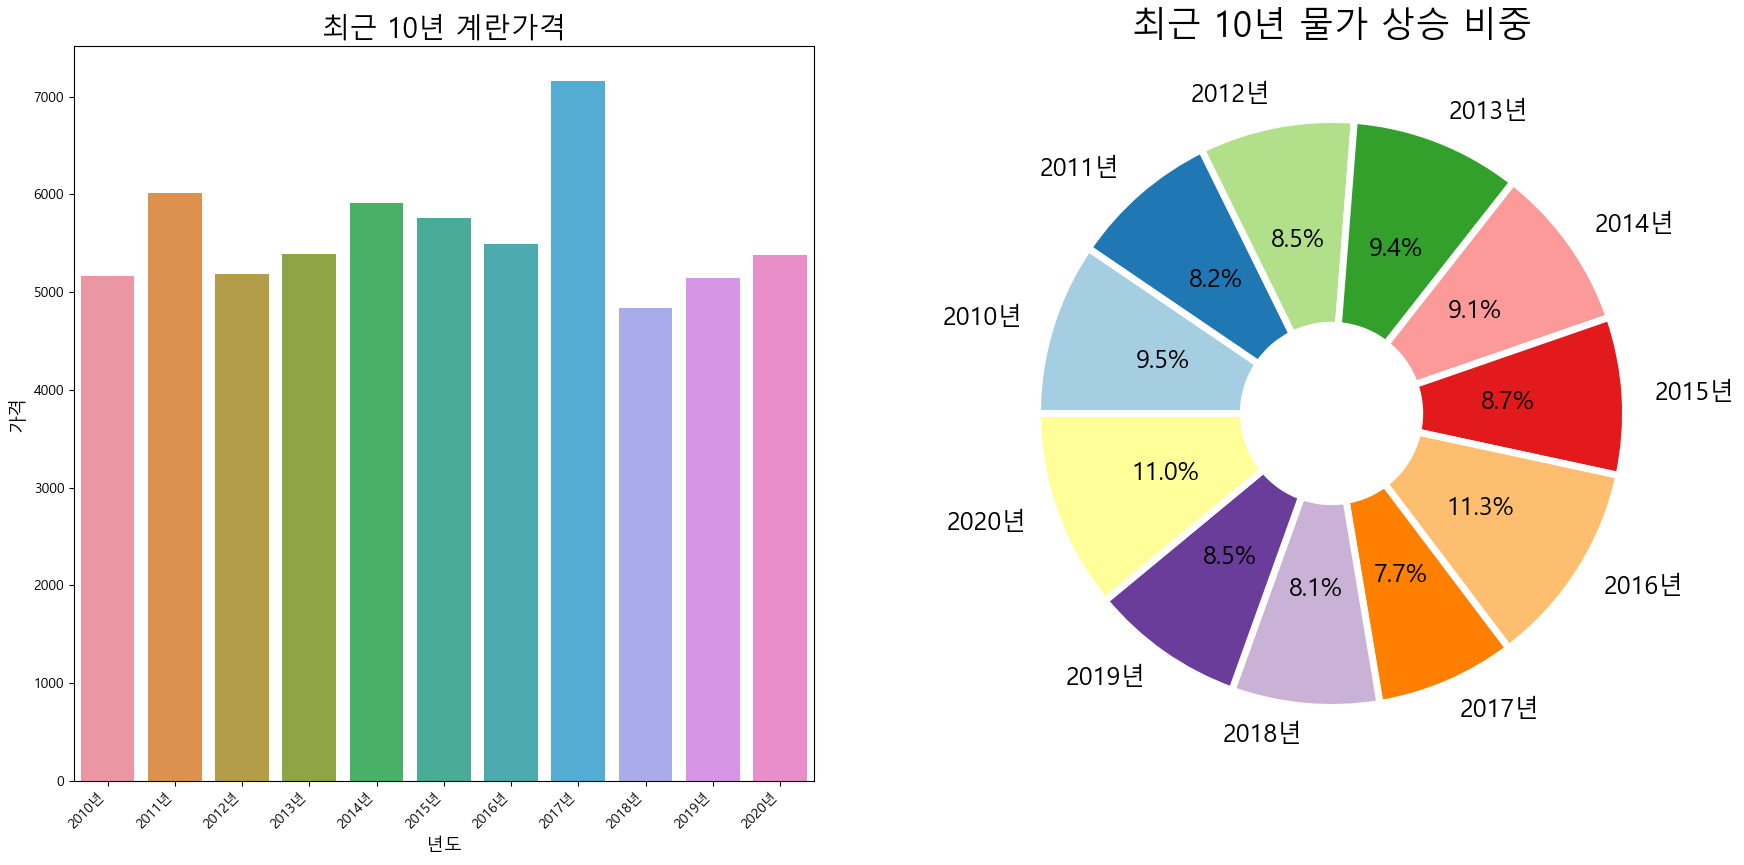

In [204]:
#도표1
labels = ['2010년','2011년','2012년','2013년','2014년','2015년','2016년','2017년','2018년','2019년','2020년']


colors = custom_palette2

plt.figure(figsize = (21,21))
plt.subplot(222)#프레임생성

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(df2['월평균'][11:22],#1%미만 절삭, 14개 모델
        labels=labels, autopct='%.1f%%', startangle=180,#시작점 
        counterclock=False, colors=colors, wedgeprops=wedgeprops,#시계방향, 색, wedgeprops
        textprops = {'fontsize':18})
# plt.legend(labels=labels, loc='upper right')#범례
plt.title("최근 10년 물가 상승 비중",size=25)


df2010_2020 = df2[10:21]
plt.subplot(221)
ax = sns.barplot(x = '년',y = '월평균' ,data=df2010_2020)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('최근 10년 계란가격', size = 20)
plt.xlabel("년도", size = 13)
plt.ylabel("가격", size = 13)
plt.show()

In [209]:
df

,Unnamed: 0,품목,월평균,전원평균,년,월,등락률
0,0,계란,2680,2551,2000년,01월,5.1
1,1,계란,2732,2680,2000년,02월,1.9
2,2,계란,2539,2732,2000년,03월,-7.1
3,3,계란,2225,2539,2000년,04월,-12.4
4,4,계란,2252,2225,2000년,05월,1.2
...,...,...,...,...,...,...,...
263,263,계란,6256,5983,2021년,12월,4.6
264,264,계란,6255,6256,2022년,01월,0.0
265,265,계란,6182,6255,2022년,02월,-1.2
266,266,계란,6420,6182,2022년,03월,3.9


<AxesSubplot: xlabel='월평균', ylabel='월'>

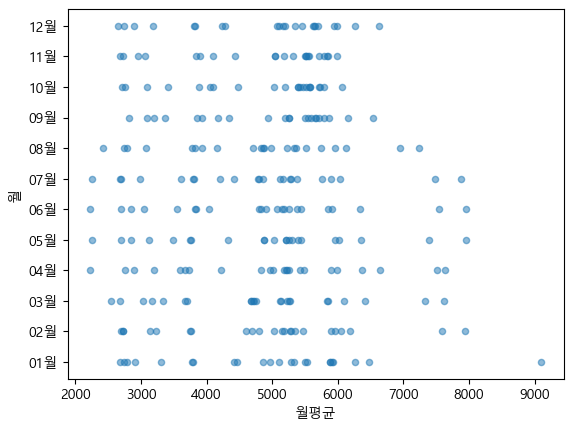

In [239]:
import matplotlib.pyplot as plt
import numpy as np



df4=pd.DataFrame({"월평균":df["월평균"],
                 "월":df["월"]})
df.plot.scatter("월평균","월",alpha = 0.5)


Text(0.5, 0, '계란값')

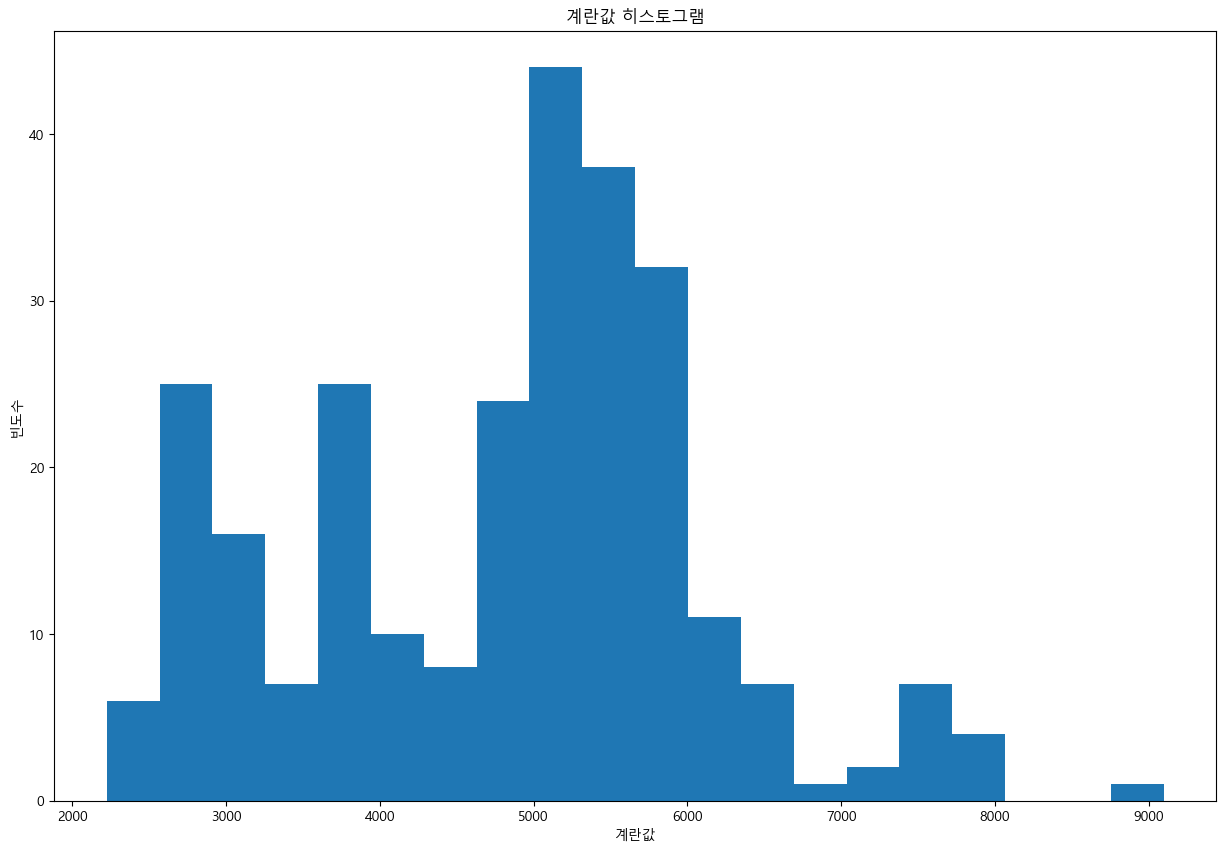

In [228]:
fig = plt.figure(figsize=(15,10)) ## 캔버스 생성
ax = fig.add_subplot()

ax.hist(df["월평균"],bins=20)
ax.set_title("계란값 히스토그램")
ax.set_ylabel("빈도수")
ax.set_xlabel("계란값")

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  268 non-null    int64  
 1   품목          268 non-null    object 
 2   월평균         268 non-null    int64  
 3   전원평균        268 non-null    int64  
 4   년           268 non-null    object 
 5   월           268 non-null    object 
 6   등락률         268 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 14.8+ KB
